<a href="https://colab.research.google.com/github/tekpinar/correlationplus/blob/master/correlationplus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install correlationplus version 0.2.1

In [1]:
#@title Install correlationplus {run: "auto"}
!pip install correlationplus

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 80.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 69.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 38.9 MB/s eta 0:00:00
Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
   ━━━━━━━━━━━━━━━━━━━━━

In [1]:
#@title Upload your PDB and trajectory files {run: "auto"}
from google.colab import files

print("Upload your PDB file:")
uploaded_pdb = files.upload()
pdb_filename = list(uploaded_pdb.keys())[0]

print("\nUpload your trajectory file (xtc, trr, or dcd):")
uploaded_traj = files.upload()
traj_filename = list(uploaded_traj.keys())[0]

print(f"\nPDB file uploaded: {pdb_filename}")
print(f"Trajectory file uploaded: {traj_filename}")

Upload your PDB file:


Saving apo-nojump-prot-traj1-ref.pdb to apo-nojump-prot-traj1-ref.pdb

Upload your trajectory file (xtc, trr, or dcd):


Saving apo-nojump-prot-traj1.xtc to apo-nojump-prot-traj1.xtc

PDB file uploaded: apo-nojump-prot-traj1-ref.pdb
Trajectory file uploaded: apo-nojump-prot-traj1.xtc


Now, let's select calculation type. If you want to calculate normalized linear mutual information (nlmi), choose nlmi. Otherwise, choose ndcc please.

In [2]:
#@title Select Calculation Type {run: "auto"}
calculationType = "nlmi" #@param ["nlmi", "ndcc"]

In [4]:
#@title Calculate the correlation metric you selected {run: "auto"}
!correlationplus calculate -t $calculationType -p $pdb_filename -f $traj_filename -o $calculationType".dat"



|------------------------------Correlation Plus------------------------------|
|                                                                            |
|        A Python package to calculate, visualize and analyze protein        |
|                           correlation maps.                                |
|               Copyright (C) Mustafa Tekpinar, 2017-2018                    |
|                   Copyright (C) CNRS-UMR3528, 2019                         |
|             Copyright (C) Institut Pasteur Paris, 2020-2021                |
|                         Author: Mustafa Tekpinar                           |
|                       Email: tekpinar@buffalo.edu                          |
|                           Licence: GNU LGPL V3                             |
|     Please cite us: https://pubs.acs.org/doi/10.1021/acs.jcim.1c00742      |
|                              Version: 0.2.1                                |
|-------------------------------------------------

We should have an nlmi.dat or ndcc.dat file in our folder. We will use it to generate images of correlation matrix. In addition, we will generate tcl files for VMD and pml files for Pymol. Here, we are submitting two parameters. '-d 15' paramater tells the program to project interactions of amino acids which has more than 15 Angstrom distance. On the other hand, '-v 0.625' tells the program to project interactions which has 0.625 nlmi (or ndcc) value or more.

In [9]:
#@title Generate 2D visualizations and projections on protein structure {run: "auto"}

!correlationplus visualize -i $calculationType".dat" -t $calculationType -p $pdb_filename -d 15 -v 0.625



|------------------------------Correlation Plus------------------------------|
|                                                                            |
|        A Python package to calculate, visualize and analyze protein        |
|                           correlation maps.                                |
|               Copyright (C) Mustafa Tekpinar, 2017-2018                    |
|                   Copyright (C) CNRS-UMR3528, 2019                         |
|             Copyright (C) Institut Pasteur Paris, 2020-2021                |
|                         Author: Mustafa Tekpinar                           |
|                       Email: tekpinar@buffalo.edu                          |
|                           Licence: GNU LGPL V3                             |
|     Please cite us: https://pubs.acs.org/doi/10.1021/acs.jcim.1c00742      |
|                              Version: 0.2.1                                |
|-------------------------------------------------

In [10]:
#@title Build a network and calculate centralities {run: "auto"}

!correlationplus analyze -i $calculationType".dat" -t $calculationType -p $pdb_filename -d 100



|------------------------------Correlation Plus------------------------------|
|                                                                            |
|        A Python package to calculate, visualize and analyze protein        |
|                           correlation maps.                                |
|               Copyright (C) Mustafa Tekpinar, 2017-2018                    |
|                   Copyright (C) CNRS-UMR3528, 2019                         |
|             Copyright (C) Institut Pasteur Paris, 2020-2021                |
|                         Author: Mustafa Tekpinar                           |
|                       Email: tekpinar@buffalo.edu                          |
|                           Licence: GNU LGPL V3                             |
|     Please cite us: https://pubs.acs.org/doi/10.1021/acs.jcim.1c00742      |
|                              Version: 0.2.1                                |
|-------------------------------------------------

In [11]:
#@title Plot interactive 2D plots of 'Current Flow Betweenness' centrality. {run: "auto"}

import plotly.graph_objects as go
import pandas as pd

# Assuming 'correlation_betweenness_value_filter0.30.dat' is in the current directory
# Replace with the actual path if needed
df = pd.read_csv('correlation_current_flow_betweenness_value_filter0.30.dat', sep='\s+', header=None, names=['Residues', 'Current Flow Betweenness'])
#print(df)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Residues'], y=df['Current Flow Betweenness'], mode='lines+markers'))

fig.update_layout(
    title="Interactive Current Flow Betweenness Plot",
    xaxis_title="Residues",
    yaxis_title="Current Flow Betweenness",
)

fig.show()

In [14]:
#@title Plot interactive 2D plots of 'Current Flow Closeness' centrality. {run: "auto"}

import plotly.graph_objects as go
import pandas as pd

# Assuming 'correlation_betweenness_value_filter0.30.dat' is in the current directory
# Replace with the actual path if needed
df = pd.read_csv('correlation_current_flow_closeness_value_filter0.30.dat', sep='\s+', header=None, names=['Residues', 'Current Flow Closeness'])
#print(df)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Residues'], y=df['Current Flow Closeness'], mode='lines+markers'))

fig.update_layout(
    title="Current Flow Closeness Centrality",
    xaxis_title="Residues",
    yaxis_title="Current Flow Closeness",
)
fig.update_traces(line_color='red', line_width=2)
fig.show()

In [15]:
#@title Plot interactive 2D plots of 'Eigenvector' centrality. {run: "auto"}

import plotly.graph_objects as go
import pandas as pd

# Assuming 'correlation_betweenness_value_filter0.30.dat' is in the current directory
# Replace with the actual path if needed
df = pd.read_csv('correlation_eigenvector_value_filter0.30.dat', sep='\s+', header=None, names=['Residues', 'Eigenvector'])
#print(df)
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Residues'], y=df['Eigenvector'], mode='lines+markers'))

fig.update_layout(
    title="Interactive Eigenvector Centrality Plot",
    xaxis_title="Residues",
    yaxis_title="Eigenvector",
)
fig.update_traces(line_color='orange', line_width=2)
fig.show()

Let's try to visualize the centralities on the protein.

**Let's start to work on sedy calculations a bit here!**

In [ ]:
!git clone https://gitlab.com/tekpinar/sedy.git

Cloning into 'sedy'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 391 (delta 16), reused 0 (delta 0), pack-reused 359 (from 1)
Receiving objects: 100% (391/391), 257.68 MiB | 37.39 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [ ]:
!cd sedy && pip install -e .

Obtaining file:///content/sedy
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Running setup.py develop for sedy
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
arviz 0.20.0 requires matplotlib>=3.5, but you have matplotlib 3.3.4 which is incompatible.
jax 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.4.33 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
plotnine 0.14.1 requires matplotlib>=3.8.0, but you h

In [ ]:
!sedy dfi -p $pdb_filename -t $traj_filename -o dfi.dat



| sedy       :  A Python toolkit to investigate relations between protein sequences and dynamics. 
|                                                                                                 
| Copyright   (C) Mustafa Tekpinar 2021-2024                                                           
| Address      :  Department of Physics, Van YYU, 65080, Van, Turkey.                   
| Email        :  tekpinar@buffalo.edu                                                            
| Licence      :  GNU LGPL V3                                                                     
|                                                                                                 
| Documentation:                                                                                  
| Citation     : .................................................................................
| Version      : 0.1.3                                                                            


@> Calculat

In [ ]:
!sedy loadit -p $pdb_filename -i dfi.dat -o dfi.pdb -s 100



| sedy       :  A Python toolkit to investigate relations between protein sequences and dynamics. 
|                                                                                                 
| Copyright   (C) Mustafa Tekpinar 2021-2024                                                           
| Address      :  Department of Physics, Van YYU, 65080, Van, Turkey.                   
| Email        :  tekpinar@buffalo.edu                                                            
| Licence      :  GNU LGPL V3                                                                     
|                                                                                                 
| Documentation:                                                                                  
| Citation     : .................................................................................
| Version      : 0.1.3                                                                            


@> 4754 ato

     #Resid     Value
0         1  0.005208
1         2  0.004973
2         3  0.004730
3         4  0.004554
4         5  0.004303
..      ...       ...
290     291  0.004662
291     292  0.005038
292     293  0.004833
293     294  0.004660
294     295  0.005215

[295 rows x 2 columns]


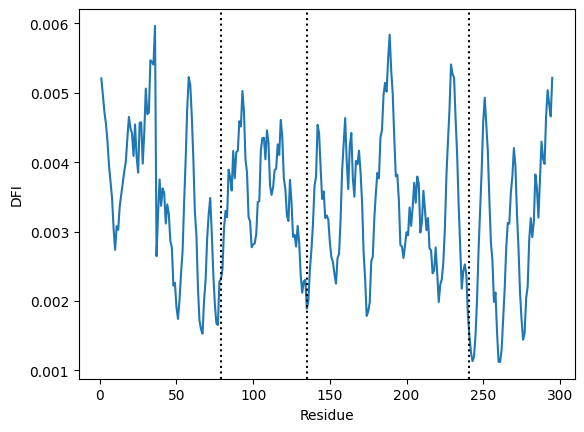

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure()
dfiDF = pd.read_csv('dfi.dat', sep='\s+')
dfiDF.drop('Chain', axis=1, inplace=True)
print(dfiDF)
plt.plot(np.array(dfiDF['#Resid']), np.array(dfiDF['Value']))
plt.xlabel('Residue')
plt.ylabel('DFI')
plt.axvline(79, linestyle=":", color='k')
plt.axvline(135, linestyle=":", color='k')
plt.axvline(241, linestyle=":", color='k')
plt.show()

In [ ]:
!pip install py3Dmol

In [ ]:
#@title Display 3D structure {run: "auto"}
import py3Dmol
import pandas as pd
import re

def get_bfactor_range(pdb_file):
    """
    Extract B-factor values from PDB file and return their range

    Parameters:
    pdb_file (str): Path to the PDB file

    Returns:
    tuple: (minimum B-factor, maximum B-factor)
    """
    bfactors = []

    with open(pdb_file, 'r') as f:
        for line in f:
            if line.startswith('ATOM') or line.startswith('HETATM'):
                try:
                    # B-factor is typically in columns 61-66
                    bfactor = float(line[60:66].strip())
                    bfactors.append(bfactor)
                except (ValueError, IndexError):
                    continue

    if not bfactors:
        return (0, 100)  # default range if no B-factors found

    return (min(bfactors), max(bfactors))

def visualize_protein_bfactor(pdb_file):
    """
    Visualize protein structure in cartoon representation colored by B-factor
    using automatically determined range and rainbow colors

    Parameters:
    pdb_file (str): Path to the PDB file
    """

    # Create a py3Dmol view instance
    view = py3Dmol.view()

    # Get B-factor range from the file
    bfactor_min, bfactor_max = get_bfactor_range(pdb_file)

    # Load the PDB file
    with open(pdb_file, 'r') as f:
        pdb_data = f.read()

    # Add the molecule to the viewer
    view.addModel(pdb_data, "pdb")

    # Set cartoon representation with rainbow coloring based on B-factor
    view.setStyle({'cartoon': {
        'colorscheme': {
            'prop': 'b',
            'gradient': 'linear',  # Using rainbow color scheme
            'min': bfactor_min,
            'max': bfactor_max,
            'colors': ["blue", "white", "red"]
        }
    }})

    # Center and zoom the view
    view.zoomTo()

    # Add legend for B-factor coloring
    view.addPropertyLabels(
        prop='b',
        gradient='bwr',
        min=bfactor_min,
        max=bfactor_max,
        legend={'x': 0.85, 'y': 0.5}
    )

    # Add text showing the B-factor range
    view.addLabel(f"B-factor range: {bfactor_min:.2f} - {bfactor_max:.2f}",
                 {'position': {'x': -20, 'y': -20, 'z': 0},
                  'backgroundColor': 'white',
                  'fontColor': 'black'})

    return view

# Replace with your PDB file path
pdb_file = "dfi.pdb"
view = visualize_protein_bfactor(pdb_file)
view.show()

# Optional: Save the visualization as HTML
# view.save('protein_visualization.html')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
!sedy schlitter -p $pdb_filename -t $traj_filename -o schlitter.dat



| sedy       :  A Python toolkit to investigate relations between protein sequences and dynamics. 
|                                                                                                 
| Copyright   (C) Mustafa Tekpinar 2021-2024                                                           
| Address      :  Department of Physics, Van YYU, 65080, Van, Turkey.                   
| Email        :  tekpinar@buffalo.edu                                                            
| Licence      :  GNU LGPL V3                                                                     
|                                                                                                 
| Documentation:                                                                                  
| Citation     : .................................................................................
| Version      : 0.1.3                                                                            


@> Calculat

     #Resid      Value
0         1  41.464027
1         2  42.245074
2         3  39.089927
3         4  40.120308
4         5  38.386320
..      ...        ...
290     291  40.461707
291     292  41.203238
292     293  41.371853
293     294  38.394216
294     295  41.528196

[295 rows x 2 columns]


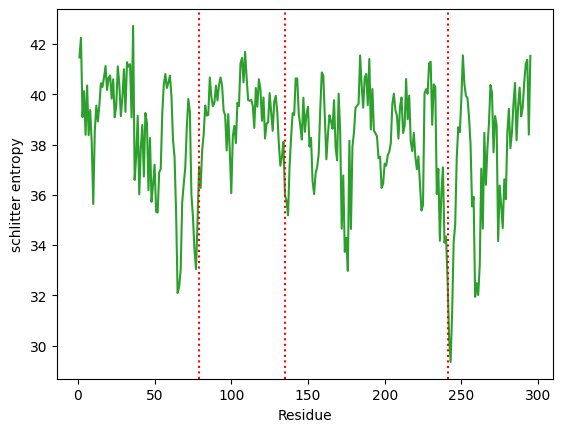

In [ ]:
plt.figure()
schlitterDF = pd.read_csv('schlitter.dat', sep='\s+')
schlitterDF.drop('Chain', axis=1, inplace=True)
print(schlitterDF)
plt.plot(np.array(schlitterDF['#Resid']), np.array(schlitterDF['Value']), color='tab:green')
plt.xlabel('Residue')
plt.ylabel('schlitter entropy')
plt.axvline(79, linestyle=":", color='red')
plt.axvline(135, linestyle=":", color='red')
plt.axvline(241, linestyle=":", color='red')
plt.show()

In [ ]:
!sedy loadit -p $pdb_filename -i schlitter.dat -o schlitter.pdb



| sedy       :  A Python toolkit to investigate relations between protein sequences and dynamics. 
|                                                                                                 
| Copyright   (C) Mustafa Tekpinar 2021-2024                                                           
| Address      :  Department of Physics, Van YYU, 65080, Van, Turkey.                   
| Email        :  tekpinar@buffalo.edu                                                            
| Licence      :  GNU LGPL V3                                                                     
|                                                                                                 
| Documentation:                                                                                  
| Citation     : .................................................................................
| Version      : 0.1.3                                                                            


@> 4754 ato

In [ ]:
pdb_file = "schlitter.pdb"
view = visualize_protein_bfactor(pdb_file)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
!sedy rmsf -p $pdb_filename -t $traj_filename -o rmsf.dat



| sedy       :  A Python toolkit to investigate relations between protein sequences and dynamics. 
|                                                                                                 
| Copyright   (C) Mustafa Tekpinar 2021-2024                                                           
| Address      :  Department of Physics, Van YYU, 65080, Van, Turkey.                   
| Email        :  tekpinar@buffalo.edu                                                            
| Licence      :  GNU LGPL V3                                                                     
|                                                                                                 
| Documentation:                                                                                  
| Citation     : .................................................................................
| Version      : 0.1.3                                                                            


@> Calculat

     #Resid      Value
0         1  26.292666
1         2  24.912031
2         3  23.769944
3         4  22.883423
4         5  21.307989
..      ...        ...
290     291  21.189628
291     292  22.611918
292     293  21.590352
293     294  21.139249
294     295  23.652240

[295 rows x 2 columns]


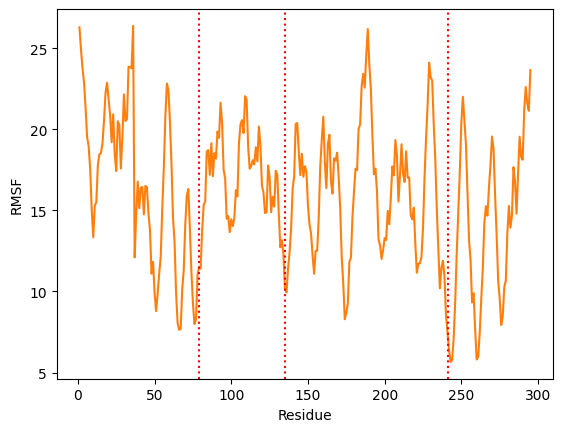

In [ ]:
plt.figure()
rmsfDF = pd.read_csv('rmsf.dat', sep='\s+')
rmsfDF.drop('Chain', axis=1, inplace=True)
print(rmsfDF)
plt.plot(np.array(rmsfDF['#Resid']), np.array(rmsfDF['Value']), color='tab:orange')
plt.xlabel('Residue')
plt.ylabel('RMSF')
plt.axvline(79, linestyle=":", color='red')
plt.axvline(135, linestyle=":", color='red')
plt.axvline(241, linestyle=":", color='red')
plt.show()

In [ ]:
!sedy loadit -p $pdb_filename -i rmsf.dat -o rmsf.pdb



| sedy       :  A Python toolkit to investigate relations between protein sequences and dynamics. 
|                                                                                                 
| Copyright   (C) Mustafa Tekpinar 2021-2024                                                           
| Address      :  Department of Physics, Van YYU, 65080, Van, Turkey.                   
| Email        :  tekpinar@buffalo.edu                                                            
| Licence      :  GNU LGPL V3                                                                     
|                                                                                                 
| Documentation:                                                                                  
| Citation     : .................................................................................
| Version      : 0.1.3                                                                            


@> 4754 ato

In [ ]:
pdb_file = "rmsf.pdb"
view = visualize_protein_bfactor(pdb_file)
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.